# Credit Scoring Assignment - Survival

### Juan José Medina

In [2]:
import lifelines 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [20]:
# load dataset
mort = pd.read_csv('./Data/mortgage.csv')

### Data Exploration

In [21]:
mort.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [22]:
mort.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [23]:
# simple imputation: drop na values
mort = mort.dropna()

Since there are only 247 values that are missing we decided to drop those rows to not affect the quality of the data

<AxesSubplot:ylabel='status_time'>

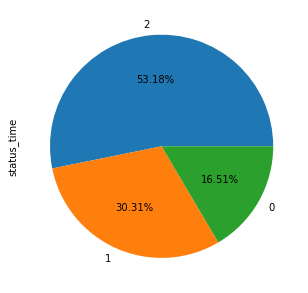

In [24]:
# display number of defaults
mort.groupby("id").agg({"status_time":np.max})["status_time"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

On this data we have 3 classification, the 1 are the defaulters, that represent 30.31% , the 2 represent payoff, and 0 represent no default nor payoff, for the survival analysis we decided to transfor all 2 into 0

In [25]:
mort["status_time"][mort["status_time"]==2] = 0

In [26]:
pd.options.display.max_columns = 100

In [27]:
# convert episodic data to static
mort_static = mort.groupby("id").agg(np.max).reset_index()

In [36]:
mort_static

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,Decile_rank
0,1,48,-7,25,113,41303.42,28.963629,9.200,226.29,3.029499,10.0,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,1,0
1,2,26,18,25,138,105826.38,65.469851,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,0,2
2,3,29,-6,25,114,44866.18,31.459735,11.375,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,0,0
3,4,60,-2,25,119,61031.10,49.156858,11.000,226.29,3.029499,10.0,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0,0
4,5,27,18,25,138,52295.07,66.346343,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49996,60,17,52,138,67229.76,65.651349,3.250,189.82,2.868594,8.0,0,0,0,1,82000.0,688,71.9,1.625,179.45,0,0,0,1
49978,49997,60,17,52,137,347558.19,87.595352,2.875,189.82,2.868594,8.0,0,0,0,0,331417.0,692,75.0,1.250,179.45,0,0,0,7
49979,49998,60,17,52,137,154505.10,91.081651,3.125,189.82,2.868594,8.0,0,0,0,0,166250.0,750,88.0,2.250,179.45,0,0,0,4
49980,49999,60,17,52,177,270027.82,52.300726,2.805,189.82,2.868594,8.0,1,0,0,0,345000.0,779,60.0,1.750,179.45,0,0,0,7


D:\Apps\anaconda3\envs\py\lib\site-packages\lifelines\plotting.py:723: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")


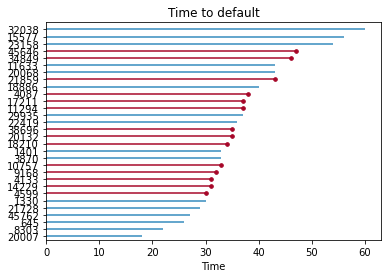

In [28]:
from lifelines.plotting import plot_lifetimes

df_samp = mort_static.sample(30)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["status_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

we can see a sample of 30 ids and see that some of them start to default aroung 36 weeks

## Grouping
since we want to analyse 2 different groups, the borrowers that have a low outstanding balance and those who have a high outstanding balance, this is done by getting the deciles, and working with the top and low 30%

In [29]:
mort_static['Decile_rank'] = pd.qcut(mort_static['balance_orig_time'], 10,
                            labels = False)

In [30]:
mort_static_high = mort_static[mort_static["Decile_rank"]>=7]
mort_static_low = mort_static[mort_static["Decile_rank"]<=2]

## Kaplan-Meier model
for the survival analysis we use the Kaplan Meier model to know the mean on which the customers start to become defaulters

36.0 high
33.0 low


C:\Users\lejua\AppData\Local\Temp/ipykernel_9916/2084830431.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([median_default_high, median_default_high], [0,1], 'k-', c="red")
C:\Users\lejua\AppData\Local\Temp/ipykernel_9916/2084830431.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([median_default_low, median_default_low], [0,1], 'k-', c="green")


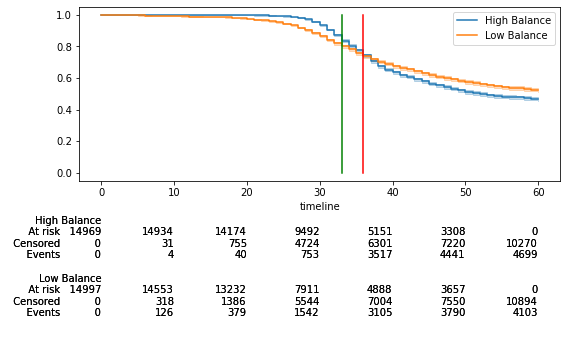

In [38]:
from lifelines.plotting import add_at_risk_counts
from lifelines import KaplanMeierFitter

# Median default_time?
median_default_high = mort_static_high.query("status_time==1")["time"].median()
print(str(median_default_high)+" high")

median_default_low = mort_static_low.query("status_time==1")["time"].median()
print(str(median_default_low)+" low")
# First train some fitters and plot them
fig = plt.figure()
ax = plt.subplot(111)

f1 = KaplanMeierFitter()
f1.fit(mort_static_high['time'], mort_static_high['status_time'],
label='High Balance')
f1.plot_survival_function(at_risk_counts=False,figsize=(8,5),ax=ax)

f2 = KaplanMeierFitter()
f2.fit(mort_static_low['time'], mort_static_low['status_time'],
label='Low Balance')
f2.plot_survival_function(at_risk_counts=False,figsize=(8,5),ax=ax)

# These calls below are equivalent
add_at_risk_counts(f1, f2)
add_at_risk_counts(f1, f2, ax=ax, fig=fig)
plt.tight_layout()

plt.plot([median_default_high, median_default_high], [0,1], 'k-', c="red")
plt.plot([median_default_low, median_default_low], [0,1], 'k-', c="green")

We compare the 2 groups and see similar lines, but when we calculate the mean we see a diference of 3 weeks, meaning that the costumers with low balance start to become defulters at week 33 and for those that have a high start to become defaulters at week 36, but we can know for sure if there is a significant difference after performing a logrank test

In [34]:
# Perform logrank test to assess whether there is a difference between Males and Females in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(mort_static_high['time'], mort_static_low['time'], event_observed_A=mort_static_high['status_time'],event_observed_B=mort_static_low['status_time'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,7.400651,0.00652,7.260906


After performing the test we can see that the P value is less than 
0.05, therefore we can reject the null hypothesis, meaning that there is evidence that there is a difference in the two groups

In [35]:
# "predict" probability to default at time 25 and 50

# 1 - probability of non-default at time 25
h25 = 1 - f1.predict(25)
l25 = 1 - f2.predict(25)


# 1 - probability of non-default at time 25
h50 = 1 - f1.predict(50)
l50 = 1 - f2.predict(50)

d = {'High': [h25, h50], 'Low': [l25, l50],'weeks': ["25", "50"]}
df = pd.DataFrame(data=d).set_index("weeks")
df

,High,Low
weeks,,
25,0.008903,0.056406
50,0.492513,0.416822


when we analyze the probability that each group defaults on week 25 and 50 we can see clarly diferences that those with a lower balance are more quicker to default, on week 25 we can see that there exist a risk of 5.64% that a client will become a defulter, compared to a 0.8% for those that have a higher balance. but we can notice that on week 50 the roles change, no the group wioth high balance have a hiogher risk of being default with 49.25% vs 41.68% 

### cox proportional hazard model
On this model we can see the efect that each increment on a variable has on the percentage of the risk of it being or becomeing a defulter

In [31]:
# select variables used in previous model + time varying variables
mort_sub = mort_static[["id","default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time","time"]]

# Assumption: time always starts at 0 (no interval censored data)
mort_sub["first_time"] = 0

C:\Users\lejua\AppData\Local\Temp/ipykernel_9916/4275965882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_sub["first_time"] = 0


In [32]:
from lifelines import CoxTimeVaryingFitter

# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(mort_sub, id_col="id", event_col="default_time", start_col="first_time", stop_col="time", show_progress=True)
ctv.summary

Iteration 7: norm_delta = 0.00000, step_size = 1.00000, ll = -137306.94073, newton_decrement = 0.00000, seconds_since_start = 3.9Convergence completed after 7 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
hpi_time,5.124827e-02,1.052584,9.341780e-04,4.941731e-02,5.307922e-02,1.050659,1.054513,0.0,54.859207,0.000000e+00,inf
gdp_time,-6.681666e-01,0.512648,1.775923e-02,-7.029741e-01,-6.333591e-01,0.495111,0.530806,0.0,-37.623614,8.838227e-310,1026.653953
uer_time,-1.096102e+00,0.334171,9.383916e-03,-1.114494e+00,-1.077710e+00,0.328081,0.340374,0.0,-116.806451,0.000000e+00,inf
balance_time,2.467593e-07,1.000000,3.273089e-08,1.826079e-07,3.109106e-07,1.000000,1.000000,0.0,7.539032,4.734727e-14,44.263712
interest_rate_time,8.870491e-02,1.092758,2.844704e-03,8.312940e-02,9.428043e-02,1.086682,1.098868,0.0,31.182473,1.841589e-213,706.689733
FICO_orig_time,-2.535101e-03,0.997468,1.234432e-04,-2.777045e-03,-2.293156e-03,0.997227,0.997709,0.0,-20.536570,1.014820e-93,308.918089
LTV_time,7.055117e-03,1.007080,2.115692e-04,6.640449e-03,7.469785e-03,1.006663,1.007498,0.0,33.346613,8.156543e-244,807.522497


In [33]:
# inspect p-values
round(ctv.summary['p'], 4)

covariate
hpi_time              0.0
gdp_time              0.0
uer_time              0.0
balance_time          0.0
interest_rate_time    0.0
FICO_orig_time        0.0
LTV_time              0.0
Name: p, dtype: float64

All the p values are significant so all variables have a weight

In [34]:
# print parameter values
print(round(ctv.params_, 6))

paramsctv = pd.DataFrame(ctv.params_)
paramsctv = paramsctv.reset_index()
# Interpretation (under ceteris paribus assumption): 
for i in range(len(paramsctv)):
    print('\n for an incrence of 1% in ' + str(paramsctv.iloc[i,0]) + '(due in the future) increases the probability to default by {:.3f}%'.format((np.exp(paramsctv.iloc[i,1]) - 1)*100))

covariate
hpi_time              0.051248
gdp_time             -0.668167
uer_time             -1.096102
balance_time          0.000000
interest_rate_time    0.088705
FICO_orig_time       -0.002535
LTV_time              0.007055
dtype: float64

 for an incrence of 1% in hpi_time(due in the future) increases the probability to default by 5.258%

 for an incrence of 1% in gdp_time(due in the future) increases the probability to default by -48.735%

 for an incrence of 1% in uer_time(due in the future) increases the probability to default by -66.583%

 for an incrence of 1% in balance_time(due in the future) increases the probability to default by 0.000%

 for an incrence of 1% in interest_rate_time(due in the future) increases the probability to default by 9.276%

 for an incrence of 1% in FICO_orig_time(due in the future) increases the probability to default by -0.253%

 for an incrence of 1% in LTV_time(due in the future) increases the probability to default by 0.708%


On the interpretation we can see that the variables that have the more weigth in changin the percentage of defult are gdp_time and uer_time, and those two are not controlled by the user, rather they are socio economic variables that are defined by the efectiveness of the goverment

In [35]:
#Custom fucntions were used with the code provided by Professor Philipp Borchert